In [18]:
import pandas as pd
import matplotlib.pyplot as plt

## Load and filter 

In [25]:
df = pd.read_csv('output/training_logs.csv')
# df = df[]

# shorten all runs to max 30 epochs
df = df[df['Epoch']<=30]

# drop all runs which have less than 3 epochs
grouped = df.groupby(['model', 'timestamp']).filter(lambda x: len(x)>=3).groupby(['model', 'timestamp'])

# Plot one feature for all

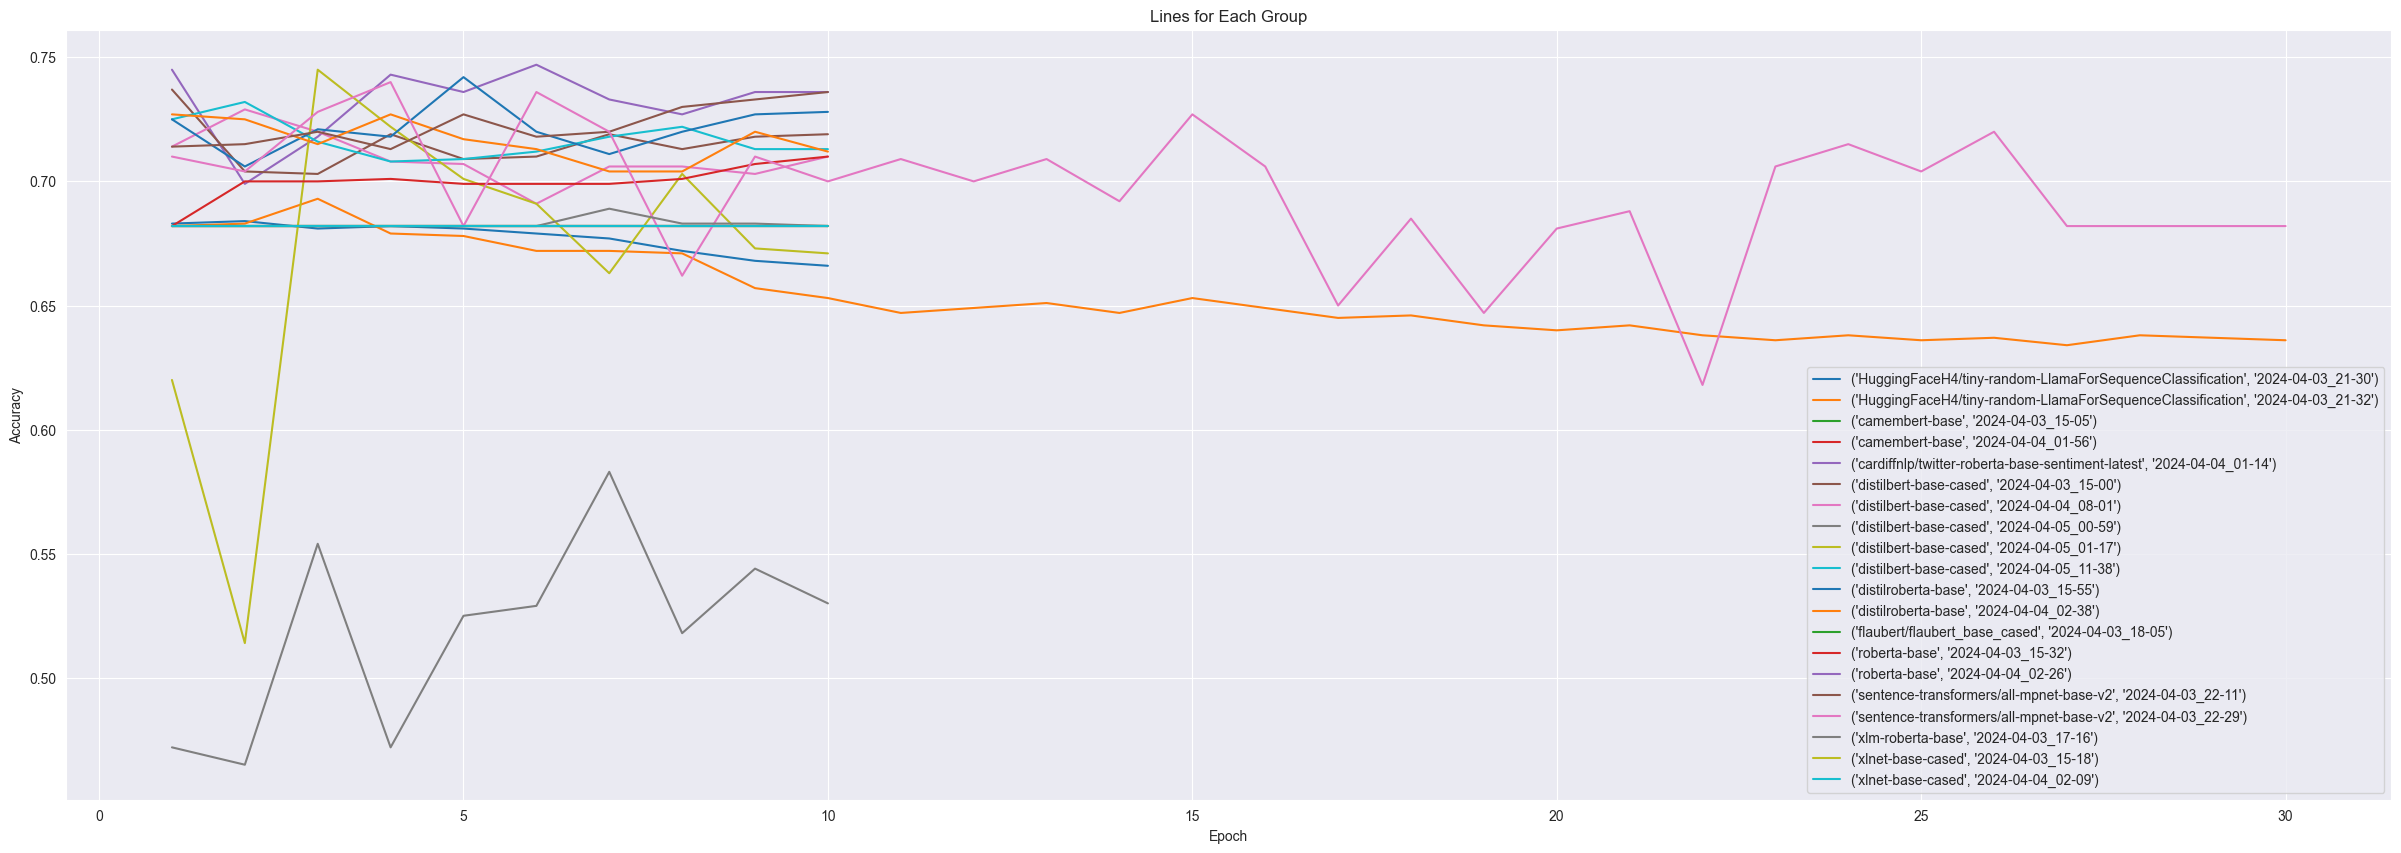

In [27]:
plt.figure(figsize=(30,10))
for name, group_df in grouped:
    plt.plot(group_df['Epoch'], group_df['Accuracy'], label=name)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Lines for Each Group')
plt.legend()
plt.show()

## Checklatest

In [ ]:
last_n_runs = 3

In [29]:
pd.to_datetime(df.timestamp, format="%Y%m%d:%H:%M:%S.%f").sort_values()

AttributeError: 'Series' object has no attribute 'sort'

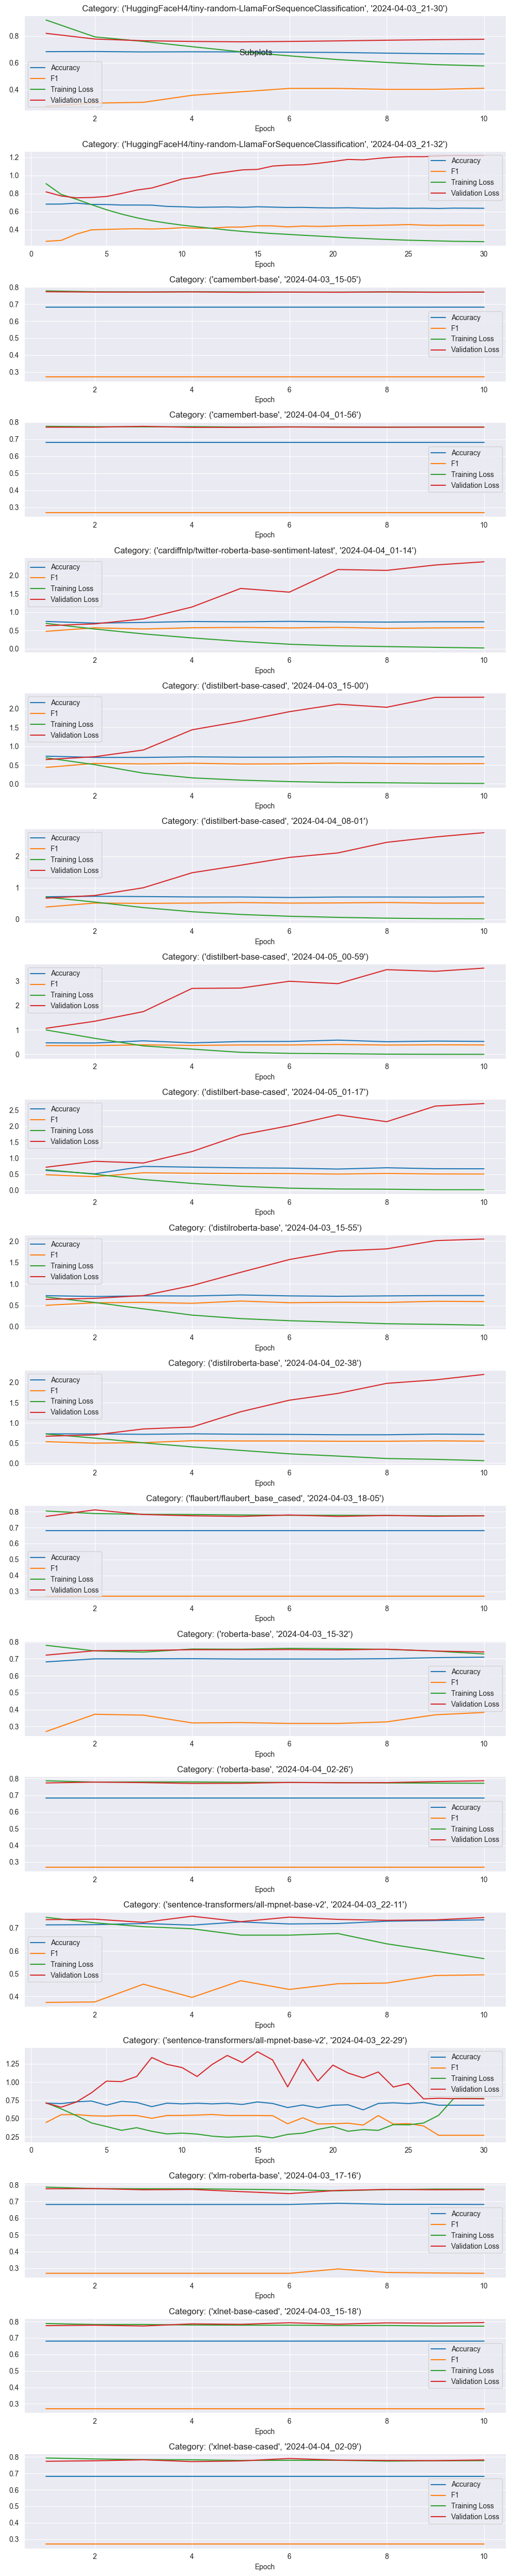

In [22]:
# Individual subplots
fig, axes = plt.subplots(nrows=len(grouped.groups), ncols=1, figsize=(10, 50))

for (group_name, group_df), ax in zip(grouped, axes):
    group_df.plot(y=['Accuracy', 'F1', 'Training Loss', 'Validation Loss'], x='Epoch', ax=ax, title=f"Category: {group_name}")

plt.tight_layout()
plt.suptitle("Subplots")
plt.show()

In [4]:
walker = pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-0006153f661724ca4VsrAvJwBg1GRDKM" style="height: auto">\n    <head>…